In [ ]:
%tensorflow_version 2.16.1


Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.


In [ ]:
!pip install tensorflow==2.16.1


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 589.8/589.8 MB 1.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.3/5.3 MB 64.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 80.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 66.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 76.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 311.2/311.2 kB 39.4 MB/s eta 0:00:00
  Attempting uninstall: ml-dtypes
    Found existing installation: ml-dtypes 0.2.0
    Uninstalling ml-dtypes-0.2.0:
      Successfully uninstalled ml-dtypes-0.2.0
  Attempting uninstall: h5py
    Found existing installation: h5py 3.9.0
    Uninstalling h5py-3.9.0:
      Successfully uninstalled h5py-3.9.0
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.15.2
    Uninstalling tensorboard-2.15.2:
      Successfully uninstalled tensorboard-2.15.2
  Attempting uninstall: keras
    Fo

In [ ]:
import tensorflow as tf
tf.__version__

'2.16.1'

## Convert Images in directory into Dataset
we can use `tf.keras.preprocessing.image_dataset_from_directory` to convert the data into dataset so we can train the models out of the box

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
dataset = '/content/drive/My Drive/dataset/Indian Medicinal Leaves Image Datasets/Medicinal Leaf dataset'
!ls "$dataset"

Mounted at /content/drive
 Aloevera       Catharanthus		  'Globe Amarnath'   Malabar_Nut       Pomoegranate
 Amla	        Chakte			   Guava	     Malabar_Spinach   Pumpkin
 Amruthaballi   Chilly			   Henna	     Mango	       Raddish
 Arali	       'Citron lime (herelikai)'   Hibiscus	     Marigold	       Rose
 ashoka         Coffee			   Honge	     Mint	       Sampige
 Astma_weed    'Common rue(naagdalli)'	   Insulin	     Neem	       Sapota
 Badipala       Coriender		   Jackfruit	     Nelavembu	       Seethaashoka
 Balloon_Vine   Curry			   Jasmine	     Nerale	       Seethapala
 Bamboo         Doddpathre		   kamakasturi	     Nooni	       Spinach1
 Beans	        Drumstick		   Kambajala	     Onion	       Tamarind
 Betel	        Ekka			   Kasambruga	     Padri	       Taro
 Bhrami         Eucalyptus		   kepala	    'Palak(Spinach)'   Tecoma
 Bringaraja     Ganigale		   Kohlrabi	     Papaya	       Thumbe
 camphor        Ganike			   Lantana	     Parijatha	       Tomato
 Caricature     Gasagase		 

In [ ]:
dataset = tf.keras.preprocessing.image_dataset_from_directory(
    dataset,
    shuffle=True,
    batch_size=32,
    image_size=(299, 299),
)

labels = dataset.class_names
labels

Found 6618 files belonging to 80 classes.


['Aloevera',
 'Amla',
 'Amruthaballi',
 'Arali',
 'Astma_weed',
 'Badipala',
 'Balloon_Vine',
 'Bamboo',
 'Beans',
 'Betel',
 'Bhrami',
 'Bringaraja',
 'Caricature',
 'Castor',
 'Catharanthus',
 'Chakte',
 'Chilly',
 'Citron lime (herelikai)',
 'Coffee',
 'Common rue(naagdalli)',
 'Coriender',
 'Curry',
 'Doddpathre',
 'Drumstick',
 'Ekka',
 'Eucalyptus',
 'Ganigale',
 'Ganike',
 'Gasagase',
 'Ginger',
 'Globe Amarnath',
 'Guava',
 'Henna',
 'Hibiscus',
 'Honge',
 'Insulin',
 'Jackfruit',
 'Jasmine',
 'Kambajala',
 'Kasambruga',
 'Kohlrabi',
 'Lantana',
 'Lemon',
 'Lemongrass',
 'Malabar_Nut',
 'Malabar_Spinach',
 'Mango',
 'Marigold',
 'Mint',
 'Neem',
 'Nelavembu',
 'Nerale',
 'Nooni',
 'Onion',
 'Padri',
 'Palak(Spinach)',
 'Papaya',
 'Parijatha',
 'Pea',
 'Pepper',
 'Pomoegranate',
 'Pumpkin',
 'Raddish',
 'Rose',
 'Sampige',
 'Sapota',
 'Seethaashoka',
 'Seethapala',
 'Spinach1',
 'Tamarind',
 'Taro',
 'Tecoma',
 'Thumbe',
 'Tomato',
 'Tulsi',
 'Turmeric',
 'ashoka',
 'camphor',
 

In [ ]:
import numpy as np

for image_batch, labels_batch in dataset.take(1):
    print(image_batch.shape)
    print(labels_batch.numpy())
    break

(32, 299, 299, 3)
[14 14 34 79 37 55 50 34 27 63 52  2 31 76 14 67 57 36 67  7 69 20 69 74
 15 74 42 46 66 29 48  1]


In [ ]:
# train test split
train_size = int(0.8 * len(dataset))
test_size = int(0.2 * len(dataset))
train_size, test_size

(165, 41)

## Train, Test, Validate
partition the data into train test and validation datasets

In [ ]:
def get_dataset_partisions_tf(ds, train_split=0.8, test_split=0.2, shuffle=True, shuffle_size=10000):
    if shuffle:
        ds = ds.shuffle(shuffle_size, seed=12)
    train_size = int(train_split * len(ds))
    test_size = int(test_split * len(ds))
    train_ds = ds.take(train_size)
    test_ds = ds.skip(train_size)
    val_ds = test_ds.skip(test_size)
    test_ds = test_ds.take(test_size)
    return train_ds, test_ds, val_ds

In [ ]:
train_ds, test_ds, val_ds = get_dataset_partisions_tf(dataset)
len(train_ds), len(test_ds), len(val_ds)

(165, 41, 1)

## Resize and Normalize
- Xception models takes the image input as 299x299 pixels so converting into the trainable format is necessary
- The Images are to be normalized before to train accurately and efficiently

In [ ]:
resize_and_rescale = tf.keras.Sequential([
    tf.keras.layers.Resizing(299, 299),
    tf.keras.layers.Rescaling(1./255)
])

### Download the Xception model predefined weights from tensorflow into your working environment

In [ ]:

base_model = tf.keras.applications.Xception(
    weights='imagenet',
    input_shape=(299, 299, 3),
    include_top=False,
    pooling='avg',
    classifier_activation='softmax',
    classes=len(labels)
)

83683744/83683744 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
base_model.trainable = False

inputs = tf.keras.Input(shape=(299, 299, 3))
x = resize_and_rescale(inputs)
x = base_model(x, training=False)
x = tf.keras.layers.Dense(128, activation='relu')(x)
x = tf.keras.layers.Dropout(0.2)(x)
outputs = tf.keras.layers.Dense(len(labels), activation='softmax')(x)
model = tf.keras.Model(inputs, outputs)

model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

model.summary()

history = model.fit(
    train_ds,
    validation_data=val_ds,
    batch_size=32,
    epochs=25
)

Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)           │ (None, 299, 299, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ sequential (Sequential)              │ (None, 299, 299, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ xception (Functional)                │ (None, 2048)                │      20,861,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │         262,272 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 80)                  │          10,320 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 21,134,072 (80.62 MB)

 Trainable params: 272,592 (1.04 MB)

 Non-trainable params: 20,861,480 (79.58 MB)

Epoch 1/25
165/165 ━━━━━━━━━━━━━━━━━━━━ 315s 285ms/step - accuracy: 0.1256 - loss: 3.8707 - val_accuracy: 0.5625 - val_loss: 2.1215
Epoch 2/25
165/165 ━━━━━━━━━━━━━━━━━━━━ 60s 195ms/step - accuracy: 0.4453 - loss: 2.2159 - val_accuracy: 0.6250 - val_loss: 1.4743
Epoch 3/25
165/165 ━━━━━━━━━━━━━━━━━━━━ 59s 195ms/step - accuracy: 0.6203 - loss: 1.5026 - val_accuracy: 0.9375 - val_loss: 0.9051
Epoch 4/25
165/165 ━━━━━━━━━━━━━━━━━━━━ 59s 194ms/step - accuracy: 0.7058 - loss: 1.1442 - val_accuracy: 0.9375 - val_loss: 0.4473
Epoch 5/25
165/165 ━━━━━━━━━━━━━━━━━━━━ 59s 195ms/step - accuracy: 0.7609 - loss: 0.9369 - val_accuracy: 0.9688 - val_loss: 0.5128
Epoch 6/25
165/165 ━━━━━━━━━━━━━━━━━━━━ 60s 193ms/step - accuracy: 0.7960 - loss: 0.7696 - val_accuracy: 0.9375 - val_loss: 0.4241
Epoch 7/25
165/165 ━━━━━━━━━━━━━━━━━━━━ 59s 194ms/step - accuracy: 0.8308 - loss: 0.6476 - val_accuracy: 0.8438 - val_loss: 0.5049
Epoch 8/25
165/165 ━━━━━━━━━━━━━━━━━━━━ 60s 194ms/step - accuracy: 0.8661 - loss: 

In [ ]:
model.save('xcept.keras')

In [ ]:
model.evaluate(test_ds)

41/41 ━━━━━━━━━━━━━━━━━━━━ 29s 27ms/step - accuracy: 0.9989 - loss: 0.0241


[0.02383572794497013, 0.9992377758026123]

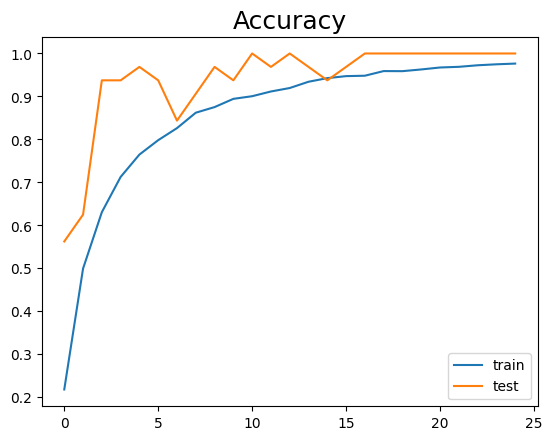

In [ ]:

import matplotlib.pyplot as plt

plt.title("Accuracy", fontdict={'fontsize':18})
plt.plot(history.history['accuracy'],label='train')
plt.plot(history.history['val_accuracy'],label='test')
plt.legend()
plt.show()


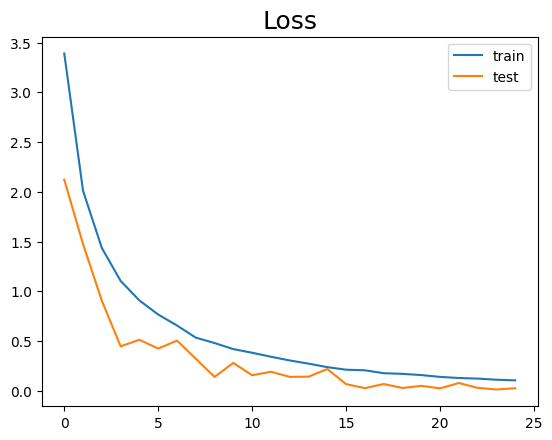

In [ ]:
plt.title("Loss", fontdict={'fontsize':18})
plt.plot(history.history['loss'],label='train')
plt.plot(history.history['val_loss'],label='test')
plt.legend()
plt.show()

In [ ]:
from sklearn.metrics import classification_report, roc_curve, roc_auc_score
import pandas as pd
import plotly.graph_objects as go
import plotly.express as px

In [ ]:
Y_train = []
X_train = []

In [ ]:
for data in train_ds:
    X_train.extend(data[0].numpy())
    Y_train.extend(data[1].numpy())

In [ ]:
Y_train = np.array(Y_train)
X_train = np.array(X_train)

In [ ]:
y_train_pred_prob = model.predict(X_train)
y_train_pred = [np.argmax(i) for i in y_train_pred_prob]

165/165 ━━━━━━━━━━━━━━━━━━━━ 10s 44ms/step


In [ ]:

def roc_auc_curve(y_scores, y_true):

    y_onehot = pd.get_dummies(y_true, columns=class_names)


    fig = go.Figure()
    fig.add_shape(
        type='line', line=dict(dash='dash'),
        x0=0, x1=1, y0=0, y1=1
    )

    for i in range(y_scores.shape[1]):
        y_true = y_onehot.iloc[:, i]
        y_score = y_scores[:, i]

        fpr, tpr, _ = roc_curve(y_true, y_score)
        auc_score = roc_auc_score(y_true, y_score)

        name = f"{class_names[i]} (AUC={auc_score:.2f})"
        fig.add_trace(go.Scatter(x=fpr, y=tpr, name=name, mode='lines'))

    fig.update_layout(
        title="ROC Curve",
        xaxis_title='False Positive Rate',
        yaxis_title='True Positive Rate',
        yaxis=dict(scaleanchor="x", scaleratio=1),
        xaxis=dict(constrain='domain'),
        width=900, height=800
    )

    return fig

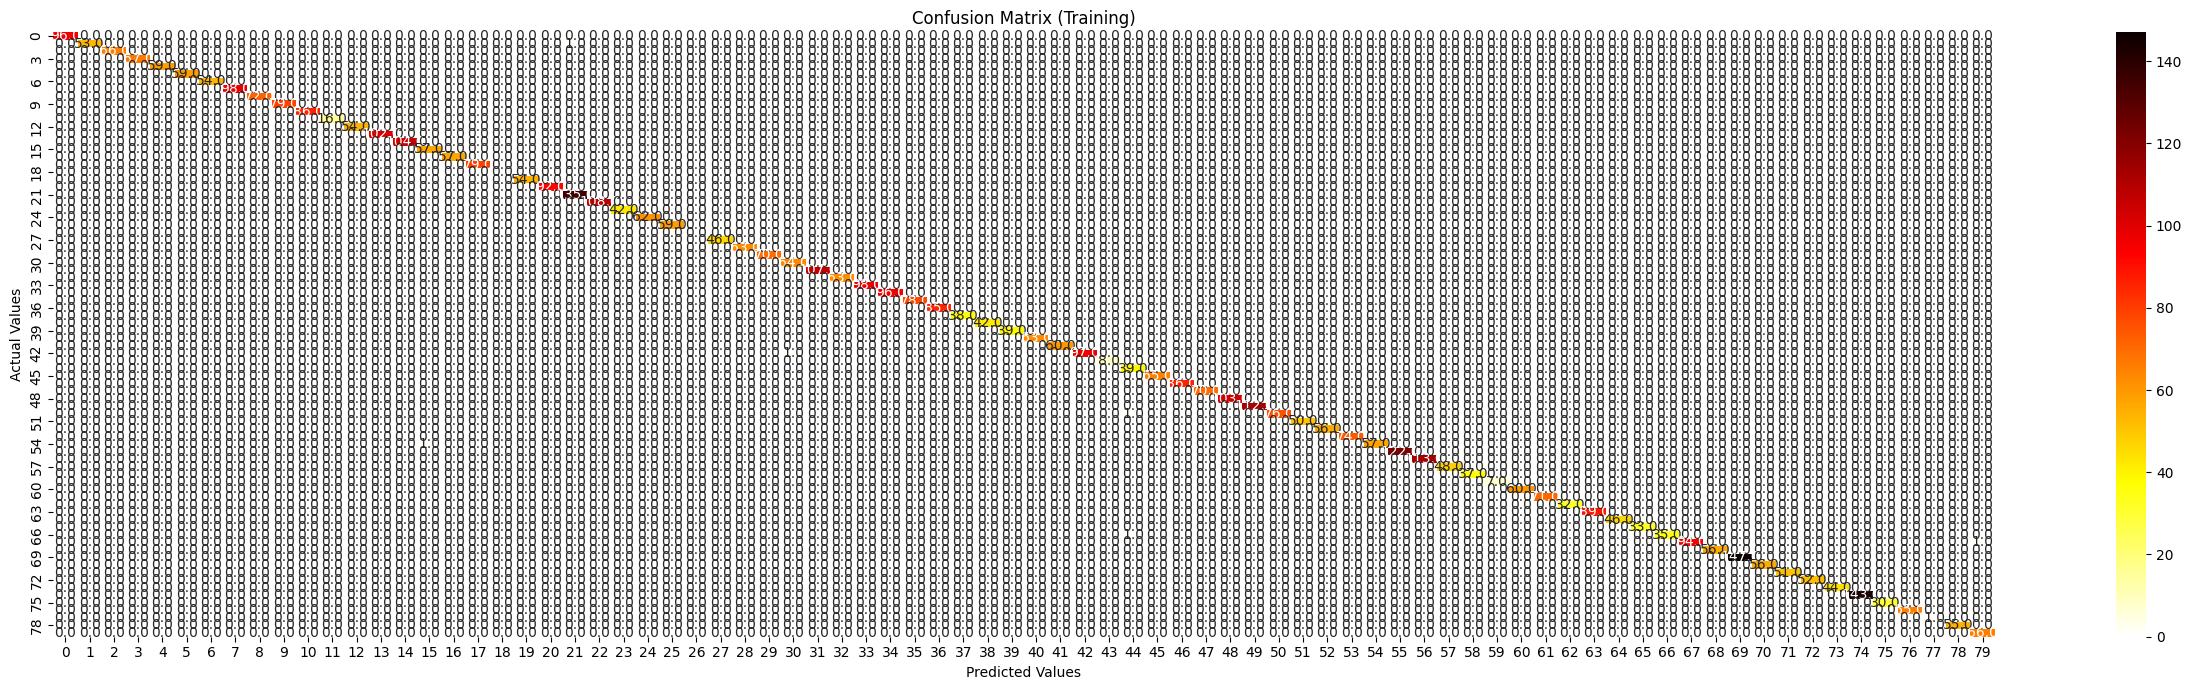

In [ ]:
import seaborn as sb
plt.figure(figsize=(25,7))
sb.heatmap(tf.math.confusion_matrix(labels=Y_train,predictions=y_train_pred),annot=True,fmt='.1f', cmap='hot_r')
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.title('Confusion Matrix (Training)')
plt.tight_layout()
plt.show()

In [ ]:
print("Classification Report for Training")
print(classification_report(Y_train, y_train_pred))

Classification Report for Training
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        96
           1       1.00      0.98      0.99        54
           2       1.00      1.00      1.00        66
           3       1.00      1.00      1.00        67
           4       1.00      1.00      1.00        59
           5       1.00      1.00      1.00        59
           6       1.00      1.00      1.00        54
           7       1.00      1.00      1.00        98
           8       1.00      1.00      1.00        72
           9       1.00      1.00      1.00        79
          10       1.00      1.00      1.00        86
          11       1.00      1.00      1.00        16
          12       1.00      1.00      1.00        54
          13       1.00      1.00      1.00       102
          14       1.00      1.00      1.00       104
          15       0.98      1.00      0.99        57
          16       1.00      1.00      1.00   